In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
import seaborn as sns
import matplotlib as mpl

In [2]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

# mpl.rcParams.update({
#                      'text.color' : "white",
#                      'lines.linewidth': 3,
#                      'font.size': 16.0,
#                      'legend.facecolor': "182742",
#                      'legend.edgecolor': 'CFB023',
#                      'legend.fancybox': True,
#                      'legend.framealpha': 1.,
#                      'legend.loc': 'right',
#                      'xtick.color': 'white',
#                      'ytick.color': 'white',
#                      'ytick.minor.visible': True,
#                      'axes.facecolor': '#182742',
#                      'axes.edgecolor': 'white',
# #                      'axes.grid.axis': 'y',
# #                      'axes.grid.which': 'minor',
#                      'axes.labelcolor' : "white",
#                      'axes.labelsize': "24",
#                      'axes.labelweight': "bold",
#                      'axes.titlesize': 28,
#                      'axes.titleweight': 'bold',
#                      'axes.titlepad': 20,
#                      'figure.facecolor': '#182742',
# #                      'xtick.bottom': False,
#                     }
#                    )

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 4,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                    }
                   )

In [3]:
datafile = 'truecode-performance-20230131.csv'

In [4]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2023-02-28')

In [5]:
def total_return(prices):
  return prices.iloc[-1] / prices.iloc[0] - 1

In [6]:
prices = pd.read_csv(datafile)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

In [7]:
prices[['Strategy', 'Bitcoin']]

,Strategy,Bitcoin
Date,,
2019-12-19,"10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900"
2019-12-21,"9,981.8100","9,975.4600"
2019-12-22,"10,342.4300","10,491.0800"
2019-12-23,"10,163.9500","10,233.2600"
...,...,...
2023-01-27,"55,211.4900","32,756.9100"
2023-01-28,"54,935.4300","32,683.7200"
2023-01-29,"56,836.2000","33,705.4300"


# Fund Statistics

In [8]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-05-01  2022-05-01
End                  2023-01-31  2023-01-31
Risk-free rate       0.00%       0.00%

Total Return         12.06%      -37.62%
Daily Sharpe         0.48        -0.56
Daily Sortino        0.78        -0.83
CAGR                 16.32%      -46.57%
Max Drawdown         -32.35%     -59.64%
Calmar Ratio         0.50        -0.78

MTD                  33.88%      39.79%
3m                   14.67%      12.86%
6m                   -1.68%      -0.72%
YTD                  33.88%      39.79%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  16.32%      -46.57%

Daily Sharpe         0.48        -0.56
Daily Sortino        0.78        -0.83
Daily Mean (ann.)    15.87%      -29.40%
Daily Vol (ann.)     33.12%      52.12%
Daily Skew           0.48        -0.72
Daily 

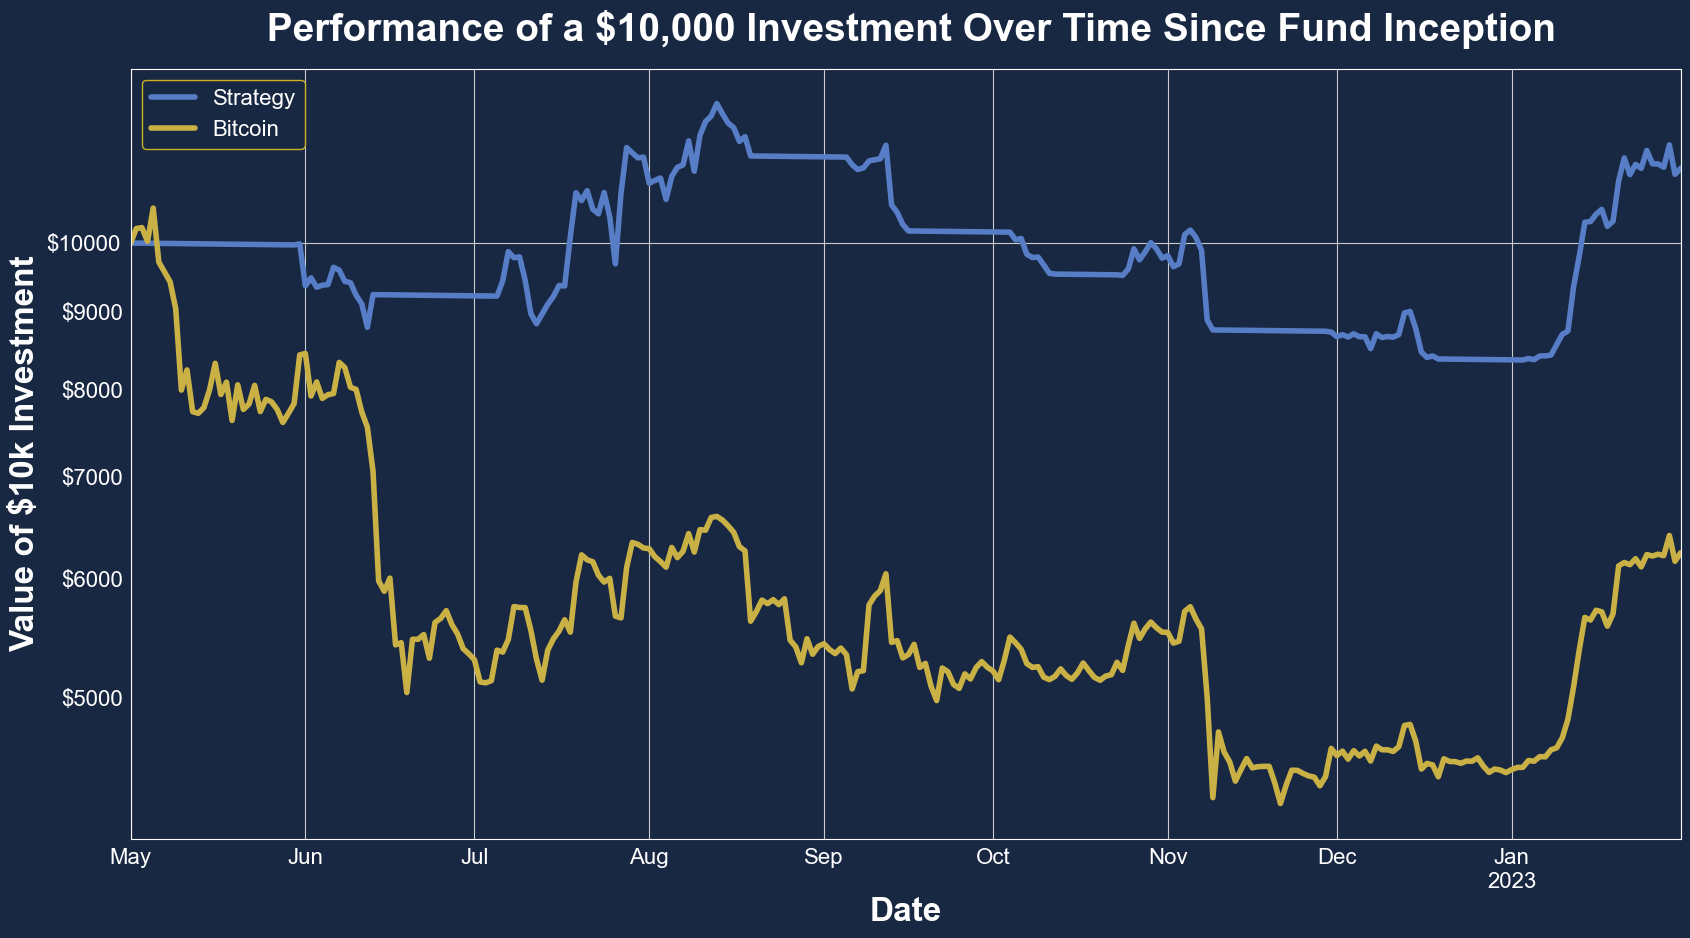

In [9]:
ax = sample[['Strategy', 'Bitcoin']].rebase(value=10000).plot.line(figsize=(20, 10), title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')


# Full History

In [10]:
stats = prices[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2019-12-19  2019-12-19
End                  2023-01-31  2023-01-31
Risk-free rate       0.00%       0.00%

Total Return         448.47%     228.29%
Daily Sharpe         1.24        0.75
Daily Sortino        2.12        1.19
CAGR                 72.59%      46.40%
Max Drawdown         -32.35%     -76.28%
Calmar Ratio         2.24        0.61

MTD                  33.88%      39.79%
3m                   14.67%      12.86%
6m                   -1.68%      -0.72%
YTD                  33.88%      39.79%
1Y                   9.20%       -38.98%
3Y (ann.)            77.35%      35.89%
5Y (ann.)            72.59%      46.40%
10Y (ann.)           -           -
Since Incep. (ann.)  72.59%      46.40%

Daily Sharpe         1.24        0.75
Daily Sortino        2.12        1.19
Daily Mean (ann.)    43.92%      45.31%
Daily Vol (ann.)     35.45%      60.67%
Daily Skew           0.48        -0.8

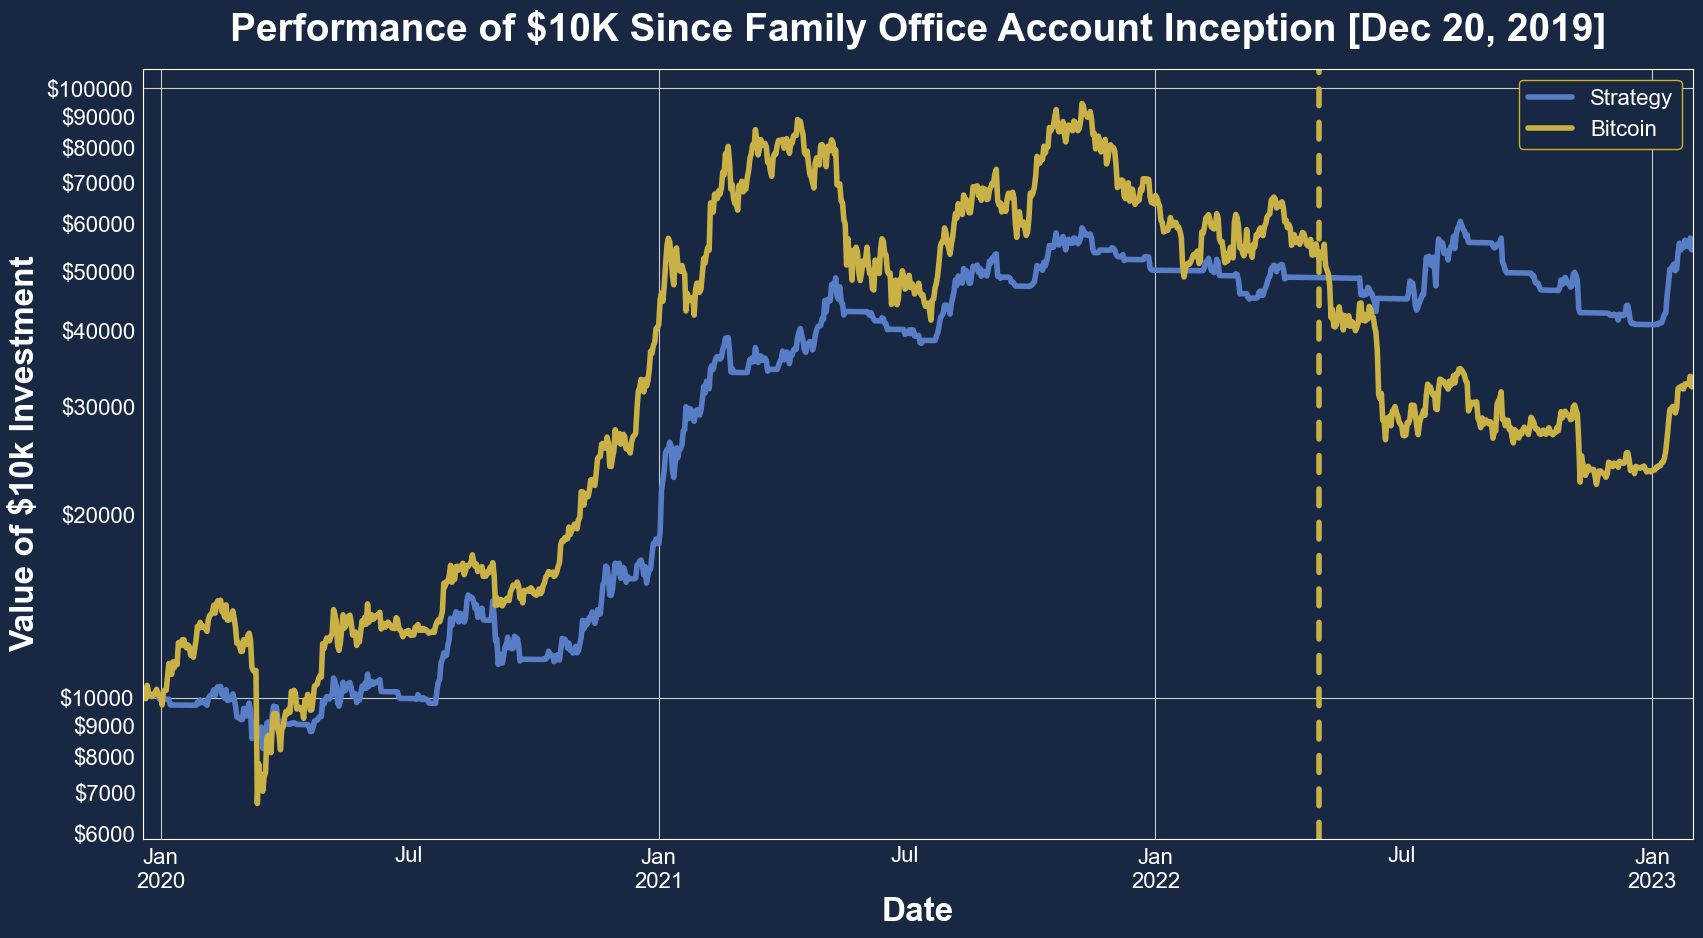

In [11]:
ax = prices[['Strategy', 'Bitcoin']].plot.line(figsize=(20, 10), title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round")
ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')


2022-09-21 00:00:00


,Strategy,Bitcoin
Date,,
2019-12-19,0.0000,0.0000
2019-12-20,0.0000,0.0000
2019-12-21,-0.0054,-0.0077
2019-12-22,0.0000,0.0000
2019-12-23,-0.0173,-0.0246
...,...,...
2023-01-27,-0.0880,-0.6531
2023-01-28,-0.0925,-0.6539
2023-01-29,-0.0611,-0.6431


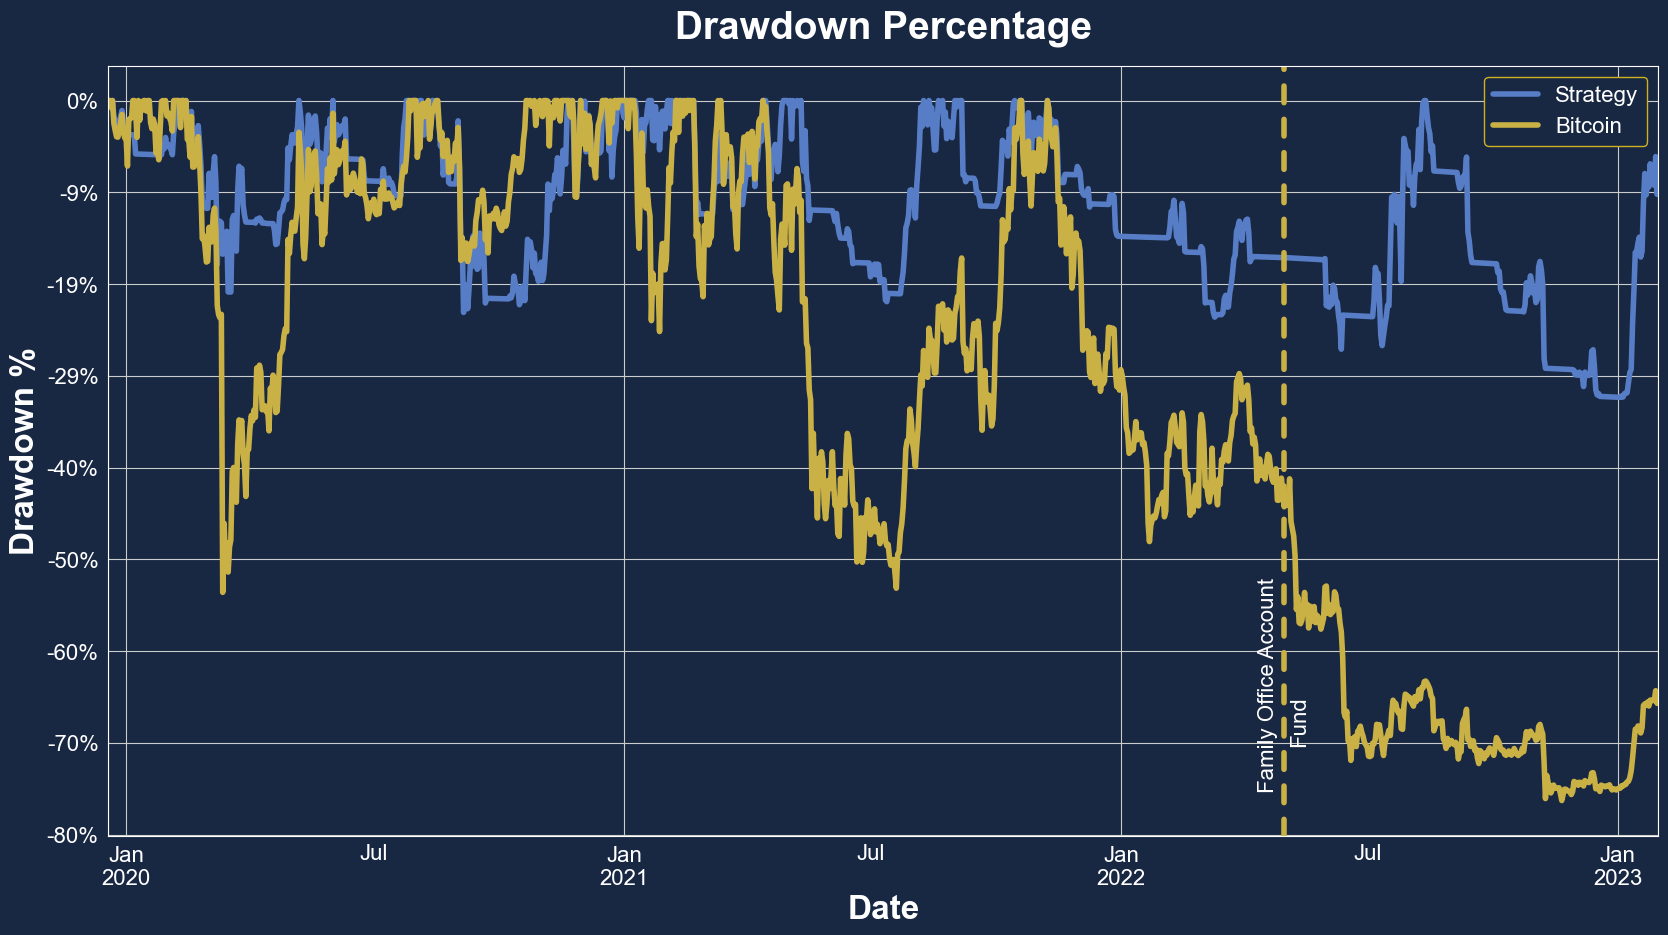

In [12]:
rebased_sample = ffn.rebase(prices[['Strategy', 'Bitcoin']], value=10000)
drawdowns = rebased_sample.to_drawdown_series()
ax = drawdowns.plot(figsize=(20, 10), ylabel='Drawdown %', title='Drawdown Percentage', color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'})
print(dt(2022, 9, 21))
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round")
ax.text(dt(2022, 5, 5), -.7,'Fund',rotation=90)
ax.text(dt(2022, 4, 12), -.75,'Family Office Account',rotation=90)

fig = ax.get_figure()
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x * 100)}%")
fig.savefig('drawdowns.pdf')
drawdowns.to_csv('drawdowns.csv')
drawdowns

In [13]:
strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(total_return)
strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date  Date
2019  12     -0.0041
2020  1      -0.0130
      2      -0.0639
      3      -0.0172
      4       0.0784
      5       0.0441
      6      -0.0877
      7       0.2512
      8       0.0009
      9      -0.1981
      10      0.0315
      11      0.3690
      12      0.1214
2021  1       0.6273
      2       0.1533
      3       0.0415
      4       0.1365
      5       0.0263
      6      -0.0649
      7       0.1174
      8       0.1540
      9      -0.0904
      10      0.1764
      11     -0.0163
      12     -0.0793
2022  1      -0.0016
      2      -0.0189
      3       0.0081
      4      -0.0412
      5      -0.0013
      6      -0.0149
      7       0.2352
      8       0.0413
      9      -0.1081
      10     -0.0391
      11     -0.1098
      12     -0.0346
2023  1       0.3389
Name: Strategy, dtype: float64

# Calculate Correlation

In [14]:
corr = prices[['Strategy', 'Bitcoin']].corr()
corr

,Strategy,Bitcoin
Strategy,1.0000,0.6918
Bitcoin,0.6918,1.0000


In [15]:
strategy_corr = corr[['Strategy']].loc['Bitcoin'].iloc[0]
print("Strategy Correlation = {:.4}".format(strategy_corr))

Strategy Correlation = 0.6918


# Calculate Volatility & Beta

In [16]:
strategy_vol = stats['Strategy'].stats['yearly_vol']
benchmark_vol = stats['Bitcoin'].stats['yearly_vol']
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(benchmark_vol))

Strategy Volatility = 0.842
Bitcoin Volatility = 1.548


# Calculate Beta

In [17]:
beta = strategy_corr * (strategy_vol / benchmark_vol)
print("Strategy Beta = {:.4}".format(beta))

Strategy Beta = 0.3763
